[0.76549847 0.71805234 0.66657941 0.61208323 0.55587964 0.49957189
 0.4449969  0.39412717 0.34889902 0.31093187 0.28114052 0.25936652
 0.24429224 0.23381808 0.22573852 0.21834328 0.21072135 0.20278426
 0.19510627 0.18864329 0.18436091 0.18284022 0.18400812 0.18713239
 0.19107061 0.19461705 0.19679971 0.19708043 0.19547755 0.19263374
 0.1898113  0.18873806 0.19120435 0.19843748 0.21055778 0.22649322
 0.24436515 0.26201949 0.27744769 0.2890609  0.29588044 0.29770288
 0.29526609 0.29039825 0.28605128 0.28598879 0.29386654 0.31186767
 0.33978573 0.37528585 0.41492642 0.45508726 0.49248112 0.5243613
 0.54859149 0.56366791 0.56872603 0.56353873 0.54850492 0.52462609
 0.4934682  0.45710489 0.41803235 0.37903378 0.34295081 0.31230876
 0.28879936 0.27280736 0.26335409 0.25867604 0.25717533 0.25823899
 0.26260964 0.27220235 0.28936652 0.31584359 0.35200253 0.3967854
 0.44819184 0.50384687 0.5613985  0.6187333  0.67407641 0.72602981
 0.77357674 0.81606463 0.85317242 0.88486609 0.91134614 0.932990

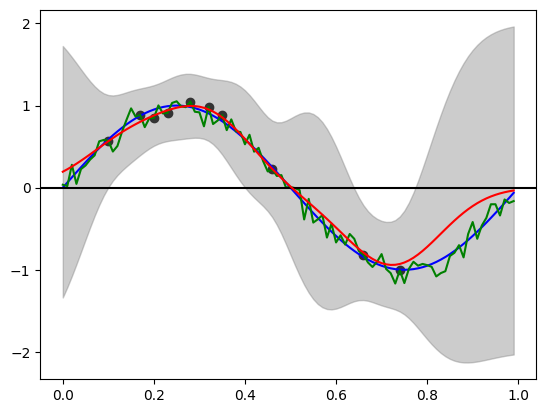

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = 1.0
f = 1
T = 1.0
samples = 100
step = 1 / samples

t = np.arange(0.0, T, step)

y = A * np.sin(2 * np.pi * f * t)

mean = 0
std_dev = 0.1
noise = np.random.normal(mean, std_dev, size=y.shape)
y_noisy = y + noise

np.random.seed(5)
indices=np.random.choice(len(t),size=10,replace=False)
dataset_y=y_noisy[indices]
dataset_t=t[indices]

plt.plot(t, y, color='blue')
plt.plot(t, y_noisy, color='green')
plt.axhline(y=0,color='black')
# plt.show()

std=1
length_scale=0.1

def kernel(x1, x2):
    k_matrix = np.zeros((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            k_matrix[i][j] = std**2 * np.exp(-0.5 * ((x1[i] - x2[j])**2) / (length_scale**2))
    return k_matrix

def noisy_kernel(x):
    k_y = kernel(x, x)
    k_y += std_dev * np.eye(len(x))
    return k_y

def mean_calc(x,x1,y):
    dot=np.dot(kernel(x,x1).T,np.linalg.inv(noisy_kernel(x)))
    mean=np.dot(dot,y)
    return mean

mean_calculated=mean_calc(dataset_t,t,dataset_y)



def var_calc(x,x1,y):
    dot=np.dot(kernel(x,x1).T,np.linalg.inv(noisy_kernel(x)))
    var=kernel(x1,x1)-np.dot(dot,kernel(x,x1))
    var += np.eye(len(x1)) * 1e-10
    return var

variance_calculated = var_calc(dataset_t, t,dataset_y)
std_devs = np.sqrt(np.diag(variance_calculated))
print(std_devs)

plt.scatter(dataset_t,dataset_y,color='black')
plt.plot(t,mean_calculated,color='red')
plt.fill_between(t, mean_calculated -2* std_devs, mean_calculated +2* std_devs, color='gray', alpha=0.4)

plt.show()
